In [31]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [62]:
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.ticker as ticker


In [170]:
def kolakoski_gen(start_items):
    c = itertools.cycle(start_items).__next__
    s, k = [], 0
    while True:
        c_next = c()
        s.append(c_next)
        sk = s[k]
        yield sk
        if sk > 1:
            s += [c_next] * (sk - 1)
        k += 1

def kolakoski(start_items=(1, 2), length=22):
    return list(itertools.islice(kolakoski_gen(start_items), length))

def binary_to_uint(seq):
    last_uchar = ""
    bytes_list = []
    for t_idx, term in enumerate(seq):
#         print(t_idx, t_idx % 8)
        last_uchar += str(term-1) 
        if t_idx % 8 == 7:
            next_byte = int(last_uchar, 2)
#             print("last_uchar", last_uchar, "to next_byte", next_byte)
            last_uchar = ""
            bytes_list.append(next_byte)
    return bytes_list

def insert_pair(ds_pairs, counts, indexes, key, key_value):
    if key not in ds_pairs.keys():
        ds_pairs[key] = [key_value]
        counts[key] = [1]
    else:
        exists = False
        for idx_value, value in enumerate(ds_pairs[key]):
            if value == key_value:
                counts[key][idx_value] = counts[key][idx_value] + 1
                exists = True
                break
        if not exists:
            ds_pairs[key].append(key_value)
            counts[key].append(1)

In [167]:
# test
seq = kolakoski(length=8*5)
print(seq)
bin_seq = binary_to_uint(seq)

# back to binary
a = bin_seq[:5]
str_res = ""
for elem in a:
    print(elem)
    bin_elem = bin(elem)[2:]
    diff = 8 - len(bin_elem)
#     print(elem, bin_elem)
#     print(diff)
    for i in range(diff):
        str_res += "1, "
    for i in bin_elem:
        str_res += "%d, " % (int(i)+1)
print(str_res)

[1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1]
101
178
105
100
182
1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 


In [156]:
kolakoski_len = int(8 * 1e7)
# # start_items = (1, 2)

# # generate sequence
# full_kola_seq = kolakoski(length=kolakoski_len)
# bytes_list = binary_to_uint(full_kola_seq)

# np.save("bytes_list_%d.npy" % kolakoski_len, np.array(bytes_list))
bytes_list = np.load("bytes_list_%d.npy" % kolakoski_len).tolist()


In [163]:
num_terms = [int(8 * 1e4), int(8 * 1e5), int(8 * 1e6), int(8 * 1e7)]
pair_seq_lens = [40, 30, 20, 17, 15, 10]
results = []

for num_total_kola_terms in num_terms:
    for pair_seq_len in pair_seq_lens:
        tmp_list = bytes_list[:num_total_kola_terms]
        pairs = {}
        # generate pairs
        for s_idx in range(0, len(tmp_list) - pair_seq_len):
            e_idx = s_idx + pair_seq_len
            insert_pair(pairs, str(tmp_list[s_idx:e_idx]), tmp_list[e_idx])
            


        # stats - count pairs
        n_keys = len(pairs.keys())
        length_key = list(pairs.keys())[0].count(", ") + 1
        no_follows = {}
        for i in range(10):
            no_follows[i] = 0

        print("Kolakoski seq len:", num_total_kola_terms)
        print("Key Length:", length_key)
        print("Number of unique sequences:", n_keys)

        print("Pair types:")
        for pair_key in pairs.keys():
            n_diff_values = len(pairs[pair_key])
            no_follows[n_diff_values] += 1

        for i in range(10):
            if no_follows[i] != 0:
                print("\t%6d Sequences have %d followups variants" % (no_follows[i], i))
        print("=========================")

        results.append([num_total_kola_terms, length_key, n_keys, no_follows[1], no_follows[2], no_follows[3], no_follows[4]])
        

Kolakoski seq len: 80000
Key Length: 40
Number of unique sequences: 69274
Pair types:
	 68639 Sequences have 1 followups variants
	   635 Sequences have 2 followups variants
Kolakoski seq len: 80000
Key Length: 30
Number of unique sequences: 59825
Pair types:
	 58677 Sequences have 1 followups variants
	  1148 Sequences have 2 followups variants
Kolakoski seq len: 80000
Key Length: 20
Number of unique sequences: 37660
Pair types:
	 34795 Sequences have 1 followups variants
	  2851 Sequences have 2 followups variants
	    14 Sequences have 3 followups variants
Kolakoski seq len: 80000
Key Length: 17
Number of unique sequences: 28566
Pair types:
	 25475 Sequences have 1 followups variants
	  3058 Sequences have 2 followups variants
	    33 Sequences have 3 followups variants
Kolakoski seq len: 80000
Key Length: 15
Number of unique sequences: 21971
Pair types:
	 18680 Sequences have 1 followups variants
	  3233 Sequences have 2 followups variants
	    58 Sequences have 3 followups variant

In [164]:
def custom_plot(ox, oy, title):
    print(oy)
    plt.title(title)
    for pair_seq_len in pair_seq_lens:
        plt.plot(ox[pair_seq_len], oy[pair_seq_len], marker='o', label="Seq len %d" % pair_seq_len)
    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2e'))
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2e'))
    plt.xscale("log")
    plt.xlabel("Numbr of Kolo Terms")
    plt.legend()
    plt.show()

{40: [69274, 279586, 308862, 308862], 30: [59825, 140725, 143930, 143930], 20: [37660, 48925, 48934, 48934], 17: [28566, 31838, 31838, 31838], 15: [21971, 23610, 23610, 23610], 10: [8112, 8126, 8126, 8126]}


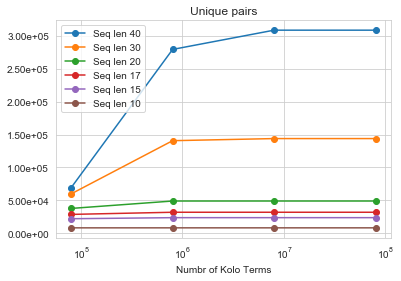

{40: [68639, 266378, 290474, 290474], 30: [58677, 126863, 128198, 128198], 20: [34795, 40956, 40958, 40958], 17: [25475, 27470, 27470, 27470], 15: [18680, 19610, 19610, 19610], 10: [6169, 6174, 6174, 6174]}


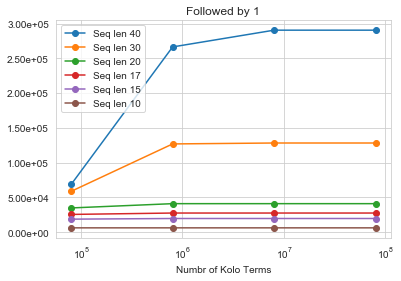

{40: [635, 13173, 18292, 18292], 30: [1148, 13793, 15636, 15636], 20: [2851, 7873, 7880, 7880], 17: [3058, 4272, 4272, 4272], 15: [3233, 3904, 3904, 3904], 10: [1847, 1856, 1856, 1856]}


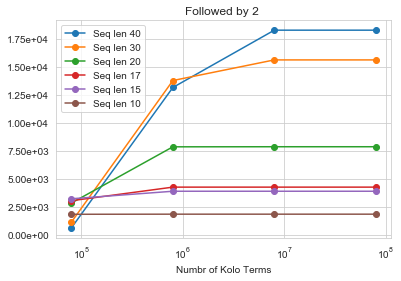

{40: [0, 35, 96, 96], 30: [0, 69, 96, 96], 20: [14, 96, 96, 96], 17: [33, 96, 96, 96], 15: [58, 96, 96, 96], 10: [96, 96, 96, 96]}


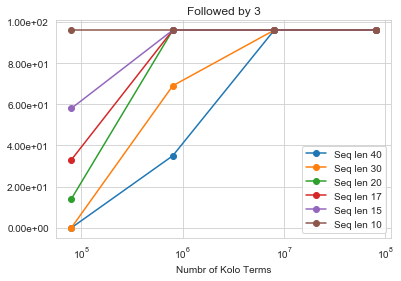

In [165]:
# plots
ox = {}
oy = {}
oy1 = {}
oy2 = {}
oy3 = {}
for pair_seq_len in pair_seq_lens:
    ox[pair_seq_len] = []
    oy[pair_seq_len] = []
    oy1[pair_seq_len] = []
    oy2[pair_seq_len] = []
    oy3[pair_seq_len] = []
    
for num_total_kola_terms in num_terms:
    for pair_seq_len in pair_seq_lens:
        for res in results:
            nkola, pair_len, n_keys, fol1, fol2, fol3, fol4 = res
            if nkola == num_total_kola_terms and pair_len == pair_seq_len:
                oy[pair_seq_len].append(n_keys)
                oy1[pair_seq_len].append(fol1)
                oy2[pair_seq_len].append(fol2)
                oy3[pair_seq_len].append(fol3)
                ox[pair_seq_len].append(nkola)

custom_plot(ox, oy, "Unique pairs")
custom_plot(ox, oy1, "Followed by 1")
custom_plot(ox, oy2, "Followed by 2 ")
custom_plot(ox, oy3, "Followed by 3")


In [ ]:
# TODO: online
# TODO: longer sequences
# TODO: de cate ori e continuat de fiecare din set??
# TODO: pe seq mici creste procentul de repetitii cu 2 followups

In [232]:
# generate datasets
num_terms = [int(8 * 1e8)]
pair_seq_lens = [40]
results = []
dataset = []

for num_total_kola_terms in num_terms:
    for pair_seq_len in pair_seq_lens:
        tmp_list = bytes_list[:num_total_kola_terms]

        # generate pairs
        for s_idx in range(0, len(tmp_list) - pair_seq_len):
            e_idx = s_idx + pair_seq_len
            ds_sample = [s_idx] + tmp_list[s_idx:e_idx] + [tmp_list[e_idx]]
            dataset.append(ds_sample)
dataset_np = np.array(dataset)

In [233]:
dataset_np.shape

(9999960, 42)

In [234]:
import random
random.seed(42)
perm = np.random.permutation(dataset_np.shape[0])
train_len = int(len(perm) * 0.8)
idxs_train = perm[:train_len]
idxs_valid = perm[train_len:]

In [235]:
print(dataset_np.shape, idxs_train.shape, idxs_valid.shape)

np.save("kolakosky_1e8.npy", dataset_np)
np.save("train_idxs.npy", idxs_train)
np.save("valid_idxs.npy", idxs_train)

In [236]:
print(dataset_np.shape, idxs_train.shape, idxs_valid.shape)

(9999960, 42) (7999968,) (1999992,)


In [203]:
# np.save("bytes_list_%d.npy" % kolakoski_len, np.array(bytes_list))

for key in pairs.keys():
    new_array = key.replace("]", "").replace("[", "").split(", ")
    new_array = list(map(int, new_array)) + pairs[key]
    print(new_array, len(new_array))
    break

[101, 178, 105, 100, 182, 90, 77, 150, 201, 105, 178, 217, 52, 182, 75, 38, 147, 101, 166, 210, 108, 180, 154, 89, 45, 54, 91, 37, 147, 105, 100, 210, 109, 44, 150, 203, 73, 180, 217, 108, 154] 41


In [188]:
# count occurences for multiple keys
for key in counts.keys():
    if len(counts[key]) > 1:
        s = sum((counts[key]))
        if s > 13:
            print(s, counts[key])

14 [10, 4]
14 [10, 4]
14 [6, 8]
15 [10, 5]
14 [6, 8]
14 [12, 2]
14 [9, 5]
